One neuron net, that finds solution for line (linear equation):  
$$y=2x+1$$  

inputs: -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5  
outputs: -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11

In [0]:
# only for the case, when you execute it in google colab:
# !pip uninstall tensorflow
# !pip install tensorflow-gpu

In [2]:
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

print(tf.__version__)

2.0.0


In [3]:
inputs = tf.constant([[-5.], [-4.], [-3.], [-2.], [-1.], [0.], [1.], [2.], [3.], [4.], [5.]], dtype=tf.float32)
outputs = tf.add(tf.multiply(inputs, 2), 1)
inputs, outputs

(<tf.Tensor: id=0, shape=(11, 1), dtype=float32, numpy=
 array([[-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.]], dtype=float32)>,
 <tf.Tensor: id=4, shape=(11, 1), dtype=float32, numpy=
 array([[-9.],
        [-7.],
        [-5.],
        [-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]], dtype=float32)>)

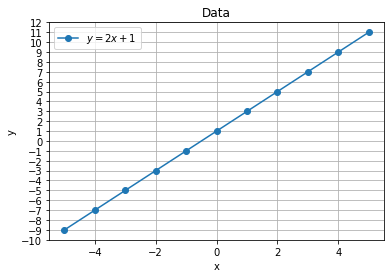

In [4]:
fig, ax = plt.subplots()

ax.plot(inputs, outputs, marker='o', label='$y=2x+1$')

ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.legend()
ax.grid(True)

plt.show()

Data have to be normalized to be in range from 0 to 1, otherwise the negative value will cause untrainable weight with combination with ReLU activation function:  
*Normalization equation for each element x from tensot t:*  
$$\frac{x-t_{min}}{t_{max}-t_{min}}$$

With normalization the line equations becomes:  
$$y=1x+0$$  
*1 = expected weight*  
*0 = expected bias*  

In [0]:
def normalize(tensor):
    '''normalize each element x from tensor to be between 0 and 1: (x-min)/(max-min)'''
    max = tf.reduce_max(tensor)
    min = tf.reduce_min(tensor)

    normed_tensor = tf.divide(tf.subtract(tensor, min), max-min)

    return normed_tensor

In [6]:
inputs_normed = normalize(inputs)
outputs_normed = normalize(outputs)
inputs_normed, outputs_normed

(<tf.Tensor: id=59, shape=(11, 1), dtype=float32, numpy=
 array([[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]], dtype=float32)>,
 <tf.Tensor: id=66, shape=(11, 1), dtype=float32, numpy=
 array([[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]], dtype=float32)>)

In [7]:
training_inputs, test_inputs = tf.split(inputs_normed, [7,4], 0)
training_inputs, test_inputs

(<tf.Tensor: id=69, shape=(7, 1), dtype=float32, numpy=
 array([[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6]], dtype=float32)>,
 <tf.Tensor: id=70, shape=(4, 1), dtype=float32, numpy=
 array([[0.7],
        [0.8],
        [0.9],
        [1. ]], dtype=float32)>)

In [8]:
training_outputs, test_outputs = tf.split(outputs_normed, [7,4], 0)
training_outputs, test_outputs

(<tf.Tensor: id=73, shape=(7, 1), dtype=float32, numpy=
 array([[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6]], dtype=float32)>,
 <tf.Tensor: id=74, shape=(4, 1), dtype=float32, numpy=
 array([[0.7],
        [0.8],
        [0.9],
        [1. ]], dtype=float32)>)

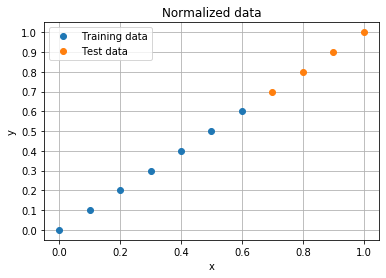

In [9]:
fig, ax = plt.subplots()

ax.plot(training_inputs, training_outputs, marker='o', linestyle='', label='Training data')
ax.plot(test_inputs, test_outputs, marker='o', linestyle='', label='Test data')

ax.set_title('Normalized data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.legend()
ax.grid(True)

plt.show()

1 fully connected (dense) layer with 1 input  
optimizer: Stochastic gradient descent  
loss function: Mean squared error https://en.wikipedia.org/wiki/Mean_squared_error  
$$\frac{1}{n}\sum_{i=1}^n (x_i-\overline{x_i})^2$$  


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='MSE',
              metrics=['accuracy'])

In [12]:
model.fit(training_inputs, training_outputs, epochs=10)

Train on 7 samples
Epoch 1/10
7/7 [==============================] - 0s 59ms/sample - loss: 0.0020 - accuracy: 0.1429
Epoch 2/10
7/7 [==============================] - 0s 827us/sample - loss: 0.0019 - accuracy: 0.1429
Epoch 3/10
7/7 [==============================] - 0s 369us/sample - loss: 0.0018 - accuracy: 0.1429
Epoch 4/10
7/7 [==============================] - 0s 421us/sample - loss: 0.0018 - accuracy: 0.1429
Epoch 5/10
7/7 [==============================] - 0s 642us/sample - loss: 0.0017 - accuracy: 0.1429
Epoch 6/10
7/7 [==============================] - 0s 428us/sample - loss: 0.0017 - accuracy: 0.1429
Epoch 7/10
7/7 [==============================] - 0s 413us/sample - loss: 0.0016 - accuracy: 0.1429
Epoch 8/10
7/7 [==============================] - 0s 395us/sample - loss: 0.0016 - accuracy: 0.1429
Epoch 9/10
7/7 [==============================] - 0s 382us/sample - loss: 0.0015 - accuracy: 0.1429
Epoch 10/10
7/7 [==============================] - 0s 664us/sample - loss: 0.0015 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
predictions = model.predict(test_inputs)
predictions

array([[0.7772765],
       [0.8892815],
       [1.0012865],
       [1.1132915]], dtype=float32)

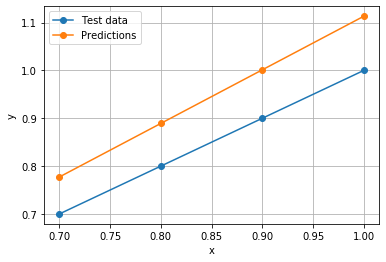

In [15]:
fig, ax = plt.subplots()

ax.plot(test_inputs, test_outputs, marker='o', label='Test data')
ax.plot(test_inputs, predictions, marker='o', label='Predictions')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(True)

plt.show()

In [16]:
params = model.get_weights()
params

[array([[1.1200497]], dtype=float32), array([-0.00675827], dtype=float32)]

In [17]:
weight, bias = params
weight = tf.squeeze(weight)
bias = tf.squeeze(bias)
weight, bias

(<tf.Tensor: id=839, shape=(), dtype=float32, numpy=1.1200497>,
 <tf.Tensor: id=841, shape=(), dtype=float32, numpy=-0.00675827>)